In [0]:
!pip uninstall opencv-python -y
# downgrade OpenCV a bit since some none-free features are not avilable
!pip install opencv-contrib-python==3.4.2.17 --force-reinstall

Uninstalling opencv-python-4.1.2.30:
  Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 137kB/s 
     |████████████████████████████████| 20.2MB 1.1MB/s 
ERROR: imgaug 0.2.9 requires opencv-python, which is not installed.
ERROR: dopamine-rl 1.0.5 requires opencv-python>=3.4.1.15, which is not installed.
ERROR: albumentations 0.1.12 requires opencv-python, which is not installed.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.4
    Uninstalling numpy-1.18.4:
      Successfully uninstalled numpy-1.18.4
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [0]:
# import basic functions
import numpy as np 
import cv2
import glob
import os 
import matplotlib.pyplot as plt

In [316]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls 'drive/My Drive/CVIT Day 4/Feature Matching/'

62.png	box_in_scene.png  box.png


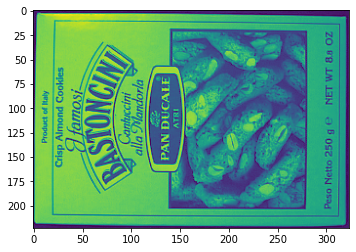

In [0]:
image1=cv2.imread('drive/My Drive/CVIT Day 4/Feature Matching/box.png',cv2.IMREAD_GRAYSCALE)
image2=cv2.imread('drive/My Drive/CVIT Day 4/Feature Matching/box_in_scene.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(image1)

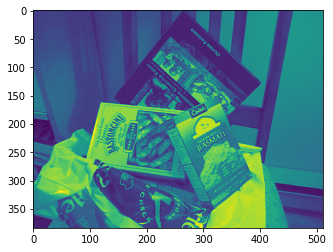

In [0]:
plt.imshow(image2)

In [0]:
# Initiate Sift detector
sift =cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(image1,None)
kp2, des2 = sift.detectAndCompute(image2,None)

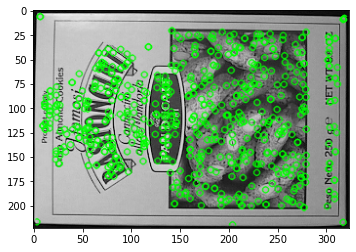

In [0]:
plt.imshow(cv2.drawKeypoints(image1,kp1,None,color=(0,255,0)))

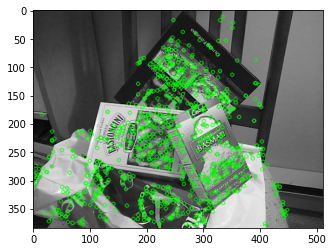

In [0]:
plt.imshow(cv2.drawKeypoints(image2,kp2,None,color=(0,255,0)))

In [0]:
# Initiate ORB detector
orb =cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(image1,None)
kp2, des2 = orb.detectAndCompute(image2,None)

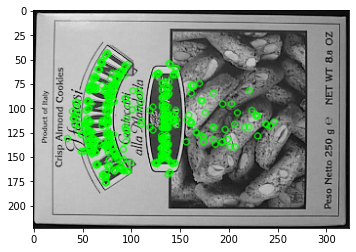

In [0]:
plt.imshow(cv2.drawKeypoints(image1,kp1,None,color=(0,255,0)))

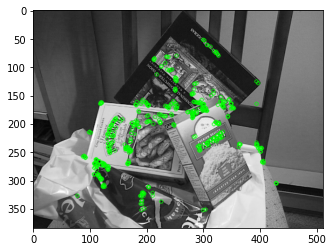

In [0]:
plt.imshow(cv2.drawKeypoints(image2,kp2,None,color=(0,255,0)))

# Matching

Text(0.5, 0, '(b)')

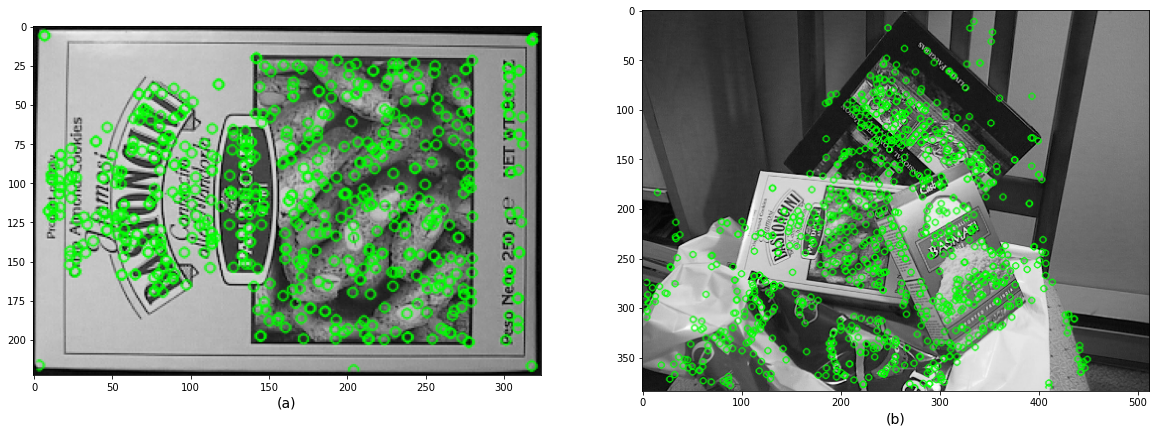

In [0]:
# display the keypoints and features detected on both images   sift one
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(image1,kp1,None,color=(0,255,0)))
ax1.set_xlabel("(a)", fontsize=14)
ax2.imshow(cv2.drawKeypoints(image2,kp2,None,color=(0,255,0)))
ax2.set_xlabel("(b)", fontsize=14)

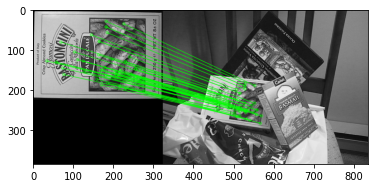

In [0]:
match = cv2.BFMatcher()
matches = match.knnMatch(des1,des2,k=2)

good = []
for m,n in matches:
    if m.distance < 0.5*n.distance:
        good.append(m)

draw_params = dict(matchColor=(0,255,0),
                       singlePointColor=None,
                       flags=2)

img3 = cv2.drawMatches(image1,kp1,image2,kp2,good,None,**draw_params)
plt.imshow(img3)

Panorama and Feature Matching 

Take an image and a pixel location (15,15). Take the window size of 3,3 such that the pixel is located at the center of the window size. Now form a vector of 9 values which are just the intensities in that window.



In [0]:
print(image1)

[[21 18 25 ... 13 14 18]
 [22 20 18 ... 16 15 14]
 [18 20 12 ... 16 15 14]
 ...
 [17 17 18 ... 19 21 13]
 [18 19 14 ... 19 18 18]
 [17 16 18 ... 19 18 18]]


In [0]:
arr = image1[14:17,14:17]

In [0]:
arr = np.array(arr)
arr.resize(9,1)

In [0]:
print(arr)

[[196]
 [195]
 [198]
 [196]
 [196]
 [199]
 [197]
 [196]
 [198]]


# Panorama

In [0]:
image1=cv2.imread('drive/My Drive/CVIT Day 4/Panorama/Eg2/img2_5.png')
image2=cv2.imread('drive/My Drive/CVIT Day 4/Panorama/Eg2/img2_6.png')

image1_gray=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
image2_gray=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

In [0]:
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(image1_gray,None)
kp2, des2 = orb.detectAndCompute(image2_gray,None)

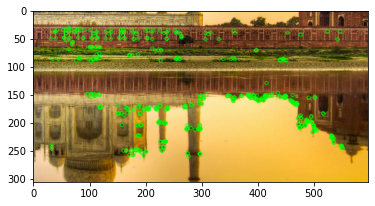

In [0]:
plt.imshow(cv2.drawKeypoints(image2,kp2,None,color=(0,255,0)))

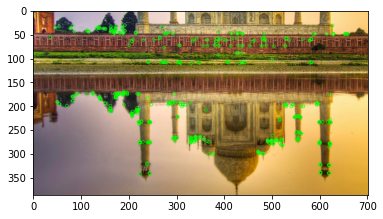

In [0]:
plt.imshow(cv2.drawKeypoints(image1,kp1,None,color=(0,255,0)))

Text(0.5, 0, '(b)')

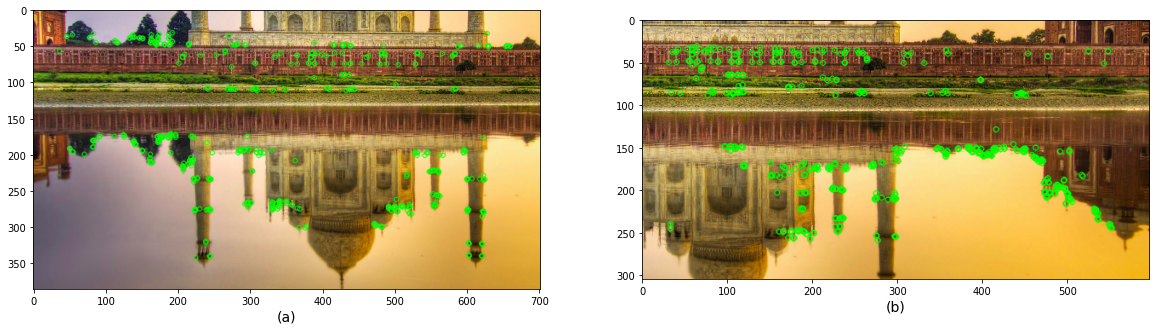

In [0]:
# display the keypoints and features detected on both images   sift one
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(image1,kp1,None,color=(0,255,0)))
ax1.set_xlabel("(a)", fontsize=14)
ax2.imshow(cv2.drawKeypoints(image2,kp2,None,color=(0,255,0)))
ax2.set_xlabel("(b)", fontsize=14)

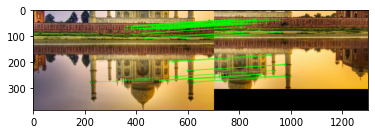

In [0]:
match = cv2.BFMatcher()
matches = match.knnMatch(des1,des2,k=2)

good = []
for m,n in matches:
    if m.distance < 0.5*n.distance:
        good.append(m)

draw_params = dict(matchColor=(0,255,0),
                       singlePointColor=None,
                       flags=2)

img3 = cv2.drawMatches(image1,kp1,image2,kp2,good,None,**draw_params)
plt.imshow(img3)

In [0]:
MIN_MATCH_COUNT = 10
if len(good) > MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)   #image taken as ref
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)    # where we map the image to

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    h,w = image2_gray.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts, M)
    #img2 = cv2.polylines(image2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

    #plt.imshow(img2)
else:
    print("Not enought matches are found - %d/%d", (len(good)/MIN_MATCH_COUNT))

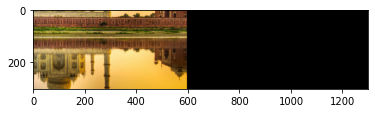

In [0]:
dst = cv2.warpPerspective(image1,M,(image2.shape[1] + image1.shape[1], image2.shape[0]))
dst[0:image2.shape[0],0:image2.shape[1]] = image2
plt.imshow(dst)


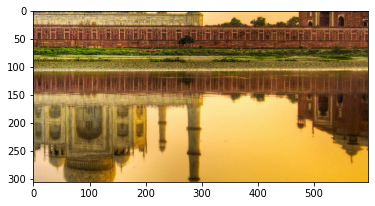

In [0]:
def trim(frame):
    #crop top
    if not np.sum(frame[0]):
        return trim(frame[1:])
    #crop bottom
    if not np.sum(frame[-1]):
        return trim(frame[:-2])
    #crop left
    if not np.sum(frame[:,0]):
        return trim(frame[:,1:])
    #crop right
    if not np.sum(frame[:,-1]):
        return trim(frame[:,:-2])
    return frame

plt.imshow(trim(dst))


In [0]:
def panoram(image1, image2,thresh):
  image1_gray=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
  image2_gray=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

  image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
  image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

  # Initiate Sift detector
  sift =cv2.xfeatures2d.SIFT_create()
  kp1, des1 = sift.detectAndCompute(image1_gray,None)
  kp2, des2 = sift.detectAndCompute(image2_gray,None)
  plt.imshow(cv2.drawKeypoints(image2,kp2,None,color=(0,255,0)))
  # display the keypoints and features detected on both images   sift one
  fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
  ax1.imshow(cv2.drawKeypoints(image1,kp1,None,color=(0,255,0)))
  ax1.set_xlabel("(a)", fontsize=14)
  ax2.imshow(cv2.drawKeypoints(image2,kp2,None,color=(0,255,0)))
  ax2.set_xlabel("(b)", fontsize=14)
  match = cv2.BFMatcher()
  matches = match.knnMatch(des1,des2,k=2)

  good = []
  for m,n in matches:
      if m.distance < 0.5*n.distance:
          good.append(m)

  draw_params = dict(matchColor=(0,255,0),
                        singlePointColor=None,
                        flags=2)

  img3 = cv2.drawMatches(image1,kp1,image2,kp2,good,None,**draw_params)
  plt.imshow(img3)
  MIN_MATCH_COUNT = thresh
  if len(good) > MIN_MATCH_COUNT:
      src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)   #image taken as ref
      dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)    # where we map the image to

      M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

      h,w = image2_gray.shape
      pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
      dst = cv2.perspectiveTransform(pts, M)
      #img2 = cv2.polylines(image2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

      #plt.imshow(img2)
  else:
      print("Not enought matches are found - %d/%d", (len(good)/MIN_MATCH_COUNT))
  dst = cv2.warpPerspective(image1,M,(image2.shape[1] + image1.shape[1], image2.shape[0]))
  dst[0:image2.shape[0],0:image2.shape[1]] = image2
  plt.imshow(dst)
  def trim(frame):
      #crop top
      if not np.sum(frame[0]):
          return trim(frame[1:])
      #crop bottom
      if not np.sum(frame[-1]):
          return trim(frame[:-2])
      #crop left
      if not np.sum(frame[:,0]):
          return trim(frame[:,1:])
      #crop right
      if not np.sum(frame[:,-1]):
          return trim(frame[:,:-2])
      return frame

  plt.imshow(trim(dst))



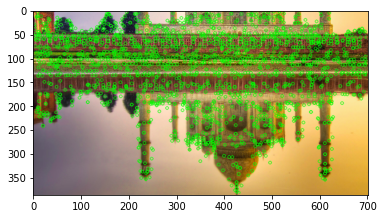

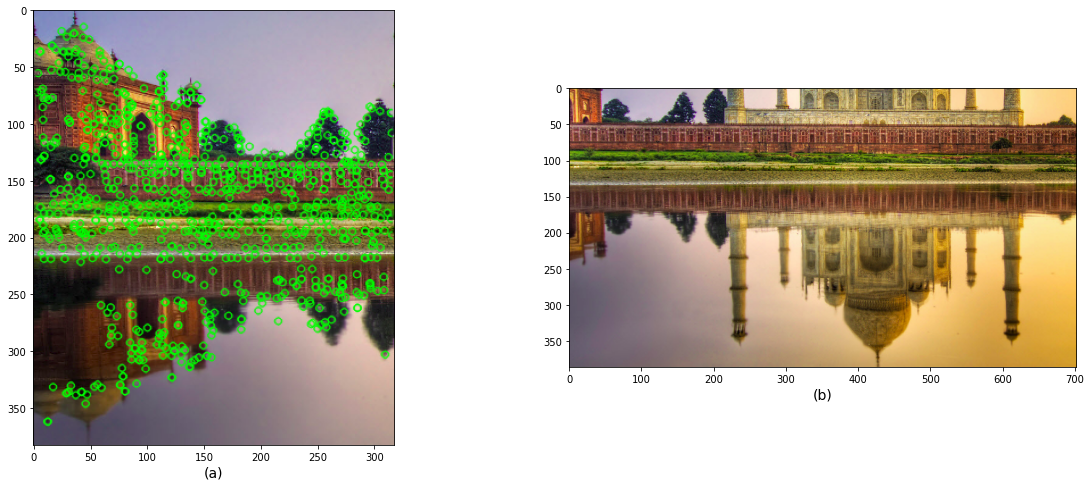

In [286]:
image1=cv2.imread('drive/My Drive/CVIT Day 4/Panorama/Eg2/img2_4.png')
image2=cv2.imread('drive/My Drive/CVIT Day 4/Panorama/Eg2/img2_5.png')
panoram(image1,image2,10)

In [256]:
print(image1.shape)

(383, 318, 3)


NOTE: Pics used below are taken by me from phone camera

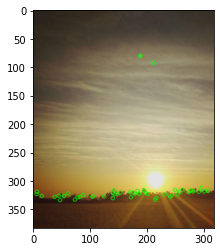

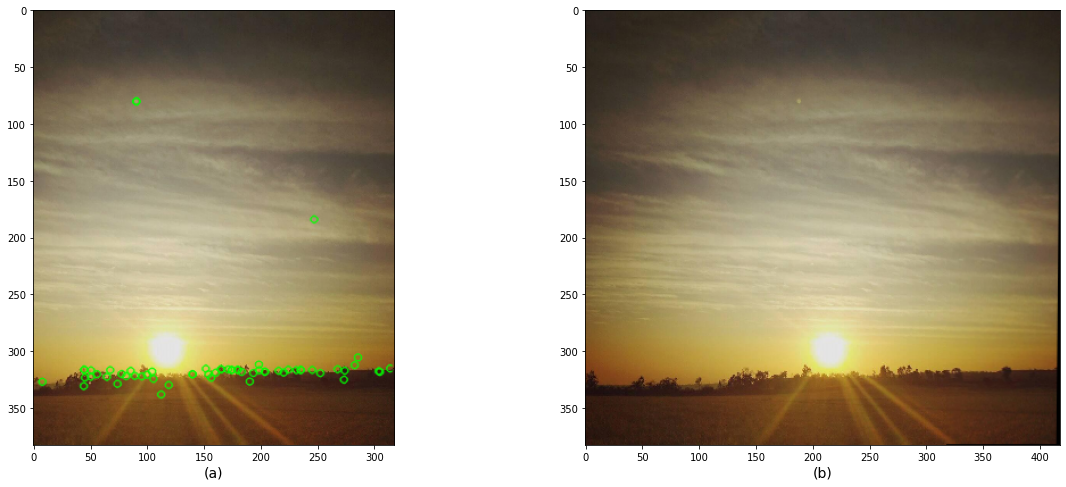

In [272]:
path3 = 'drive/My Drive/images1/'
image1=cv2.imread(path3+'sunsets_right.jpg')
image2=cv2.imread(path3+'sunsets_left.jpg')
I1 = cv2.resize(image1,(318,383))
I2 = cv2.resize(image2,(318,383))
panoram(I1,I2,10)

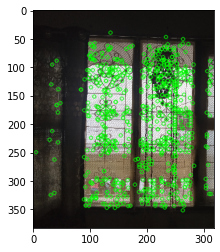

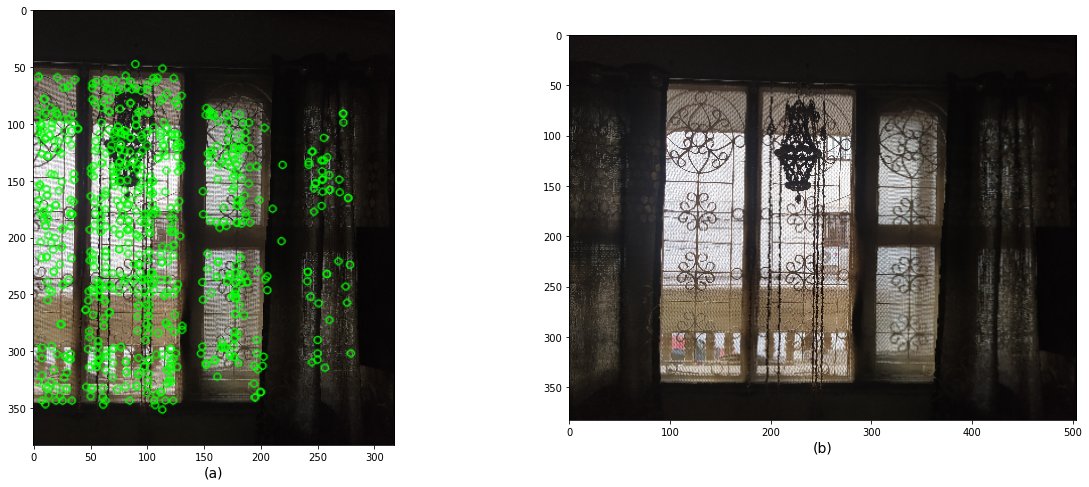

In [273]:
path3 = 'drive/My Drive/images1/'
image1=cv2.imread(path3+'curtain_window_r.jpg')
image2=cv2.imread(path3+'curtain_window_l.jpg')
I1 = cv2.resize(image1,(318,383))
I2 = cv2.resize(image2,(318,383))
panoram(I1,I2,1)

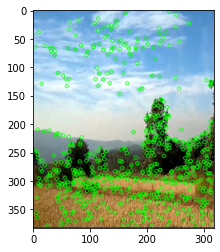

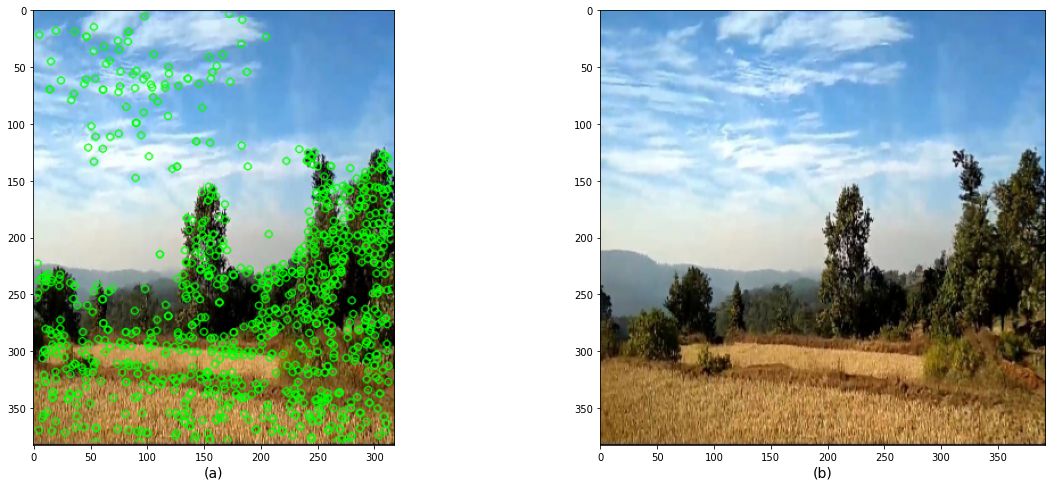

In [274]:
path3 = 'drive/My Drive/images1/'
image1=cv2.imread(path3+'mainpat_r.jpg')
image2=cv2.imread(path3+'mainpat_l.jpg')
I1 = cv2.resize(image1,(318,383))
I2 = cv2.resize(image2,(318,383))
panoram(I1,I2,6)

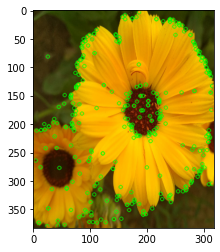

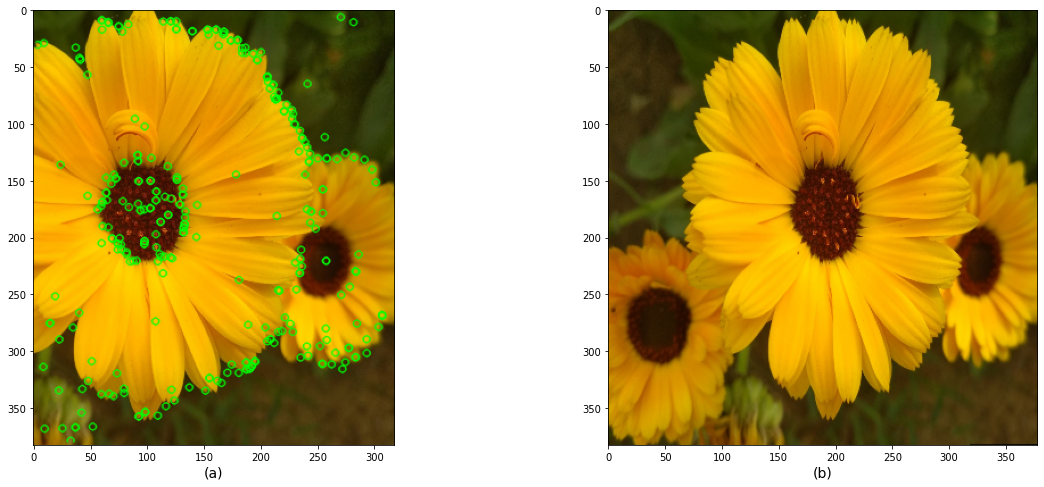

In [275]:
path3 = 'drive/My Drive/images1/'
image1=cv2.imread(path3+'sunflower_r.jpg')
image2=cv2.imread(path3+'sunflower_l.jpg')
I1 = cv2.resize(image1,(318,383))
I2 = cv2.resize(image2,(318,383))
panoram(I1,I2,6)

# Example default

In [0]:
def trim(frame):
          #crop top
          if not np.sum(frame[0]):
              return trim(frame[1:])
          #crop bottom
          if not np.sum(frame[-1]):
              return trim(frame[:-2])
          #crop left
          if not np.sum(frame[:,0]):
              return trim(frame[:,1:])
          #crop right
          if not np.sum(frame[:,-1]):
              return trim(frame[:,:-2])
          return frame

def panorama(path_right,path_left,thres):

      image1=cv2.imread(path_right)
      image2=cv2.imread(path_left)

      image1_gray=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
      image2_gray=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

      image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
      image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

      # Initiate Sift detector
      sift =cv2.xfeatures2d.SIFT_create()
      kp1, des1 = sift.detectAndCompute(image1_gray,None)
      kp2, des2 = sift.detectAndCompute(image2_gray,None)

      # display the keypoints and features detected on both images
      #fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
      #ax1.imshow(cv2.drawKeypoints(image1_gray,kp1,None,color=(0,255,0)))
      #ax1.set_xlabel("(a)", fontsize=14)
      #ax2.imshow(cv2.drawKeypoints(image2_gray,kp2,None,color=(0,255,0)))
      #ax2.set_xlabel("(b)", fontsize=14)

      match = cv2.BFMatcher()
      matches = match.knnMatch(des1,des2,k=2)

      good = []
      for m,n in matches:
          if m.distance < 0.7*n.distance:
              good.append(m)

      draw_params = dict(matchColor=(0,255,0),
                            singlePointColor=None,
                            flags=2)

      img3 = cv2.drawMatches(image1_gray,kp1,image2_gray,kp2,good,None,**draw_params)
      #plt.imshow(img3)

      MIN_MATCH_COUNT = thres
      if len(good) > MIN_MATCH_COUNT:
          src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
          dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

          M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

          h,w = image2_gray.shape
          pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
          dst = cv2.perspectiveTransform(pts, M)
          #img2 = cv2.polylines(image2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

          #plt.imshow(img2)
      else:
          print("Not enought matches are found - %d/%d", (len(good)/MIN_MATCH_COUNT))

      dst = cv2.warpPerspective(image1,M,(image2.shape[1] + image1.shape[1], image2.shape[0]+ image1.shape[0]))
      dst[0:image2.shape[0],0:image2.shape[1]] = image2
      #plt.imshow(dst)

      
      plt.imshow(trim(dst))
      #cv2.imsave("original_image_stitched_crop.jpg", trim(dst))
      return(trim(dst))

In [0]:
def pano(eg,thres):
  root='drive/My Drive/CVIT Day 4/Panorama/'+eg+'/'
  images=os.listdir(root)
  save_path='drive/My Drive/CVIT Day 4/Panorama/Outputs/'+eg+'/'
  for i in range (len(images)-1):
    path_right=root+images[i+1] 
    if i==0:
      path_left=root+images[i]
    else:
      path_left=save_image
    img_new=panorama(path_right,path_left,thres)
    save_image=save_path+images[i+1][:-4]+"output.png"
    cv2.imwrite(save_image, cv2.cvtColor(img_new, cv2.COLOR_RGB2BGR))

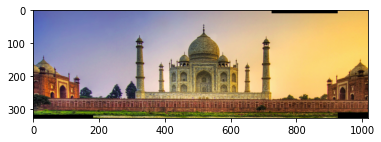

In [301]:
pano('Eg1',10)

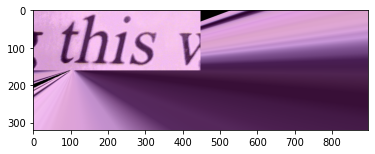

In [312]:
pano('Eg3',3)

##Part 2

Task 1) Map the book in the image to a rectangular window of width=400 and height=400.
Function for homography- cv2.findHomography(pts_src, pts_dst)


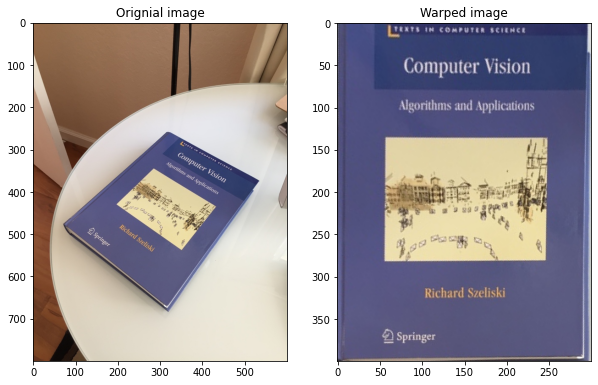

In [0]:
root='drive/My Drive/Day4 Material/'
book1=cv2.imread(root+'book1.jpg')
height,width = 400,300
im_dst = np.zeros((height,width,3))

pts_dst = np.empty((0,2))
pts_dst = np.append(pts_dst,[(0,0)], axis=0)
pts_dst = np.append(pts_dst, [(0,height-1)],axis=0)
pts_dst = np.append(pts_dst,[(width-1,height-1)], axis=0)

pts_dst = np.append(pts_dst, [(width-1,0)],axis=0)

pts_src =  np.array([[315,259],[73,479],[322,684],[536,377]])

t,s = cv2.findHomography(pts_src,pts_dst)
im_dst = cv2.warpPerspective(book1, t,(width,height))

f,ax = plt.subplots(1,2,figsize=(10,8))
ax[0].imshow(cv2.cvtColor(book1,cv2.COLOR_BGR2RGB))
ax[0].set_title('Orignial image')
ax[1].imshow(cv2.cvtColor(im_dst,cv2.COLOR_BGR2RGB))
ax[1].set_title('Warped image')
plt.show()



Task2) Align the book in the book1.jpg to the book in the book2.jpg

pts_src = np.array([[141, 131], [480, 159], [493, 630],[64, 601]], dtype=float)

pts_dst = np.array([[318, 256],[534, 372],[316, 670],[73, 473]], dtype=float)


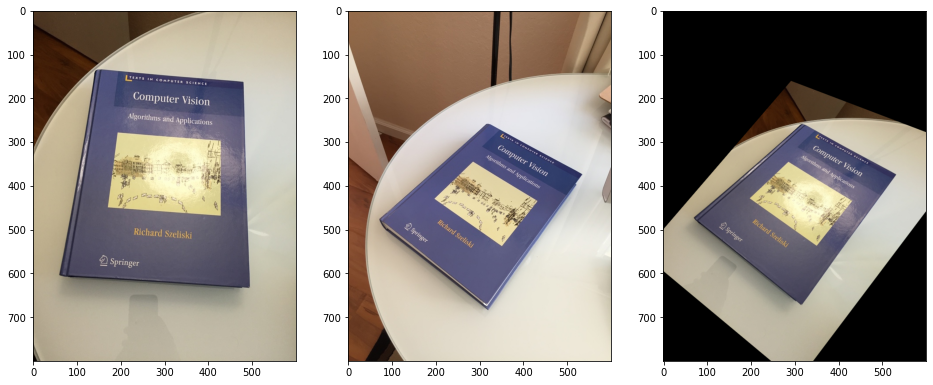

In [0]:
book2 = cv2.imread(root+'book2.jpg')
book1 = cv2.imread(root+'book1.jpg')
pts_src = np.array([[141, 131], [480, 159], [493, 630],[64, 601]], dtype=float)
pts_dst = np.array([[318, 256],[534, 372],[316, 670],[73, 473]], dtype=float)

h,s = cv2.findHomography(pts_src,pts_dst)
im_out = cv2.warpPerspective(book2, h,(book1.shape[1],book1.shape[0]))

fig, ax = plt.subplots(1,3,figsize=(16,12))

ax[0].imshow(cv2.cvtColor(book2,cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(book1,cv2.COLOR_BGR2RGB))
ax[2].imshow(cv2.cvtColor(im_out,cv2.COLOR_BGR2RGB))
plt.show()

 You can take tsukuba_l and tsukuba_r images from the drive link and use 

cv2.StereoBM_create(numDisparities=16, blockSize=15) to get disparity map

After getting the disparity map try to remove objects from the image whose disparity is  less  than a  particular threshold say 120.


In [0]:
tsu_l=cv2.imread(root+'tsukuba_l.png',0)
tsu_r=cv2.imread(root+'tsukuba_r.png',0)

In [0]:
def cut(disp,img,th):
  im = np.copy(img)
  for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
      if(disp[i,j]<th):
        im[i,j]=0
  return im

In [0]:
ste = cv2.StereoBM_create(numDisparities=16,blockSize=15)
disp = ste.compute(tsu_l,tsu_r)

In [0]:
ret = cut(disp,tsu_l,2)

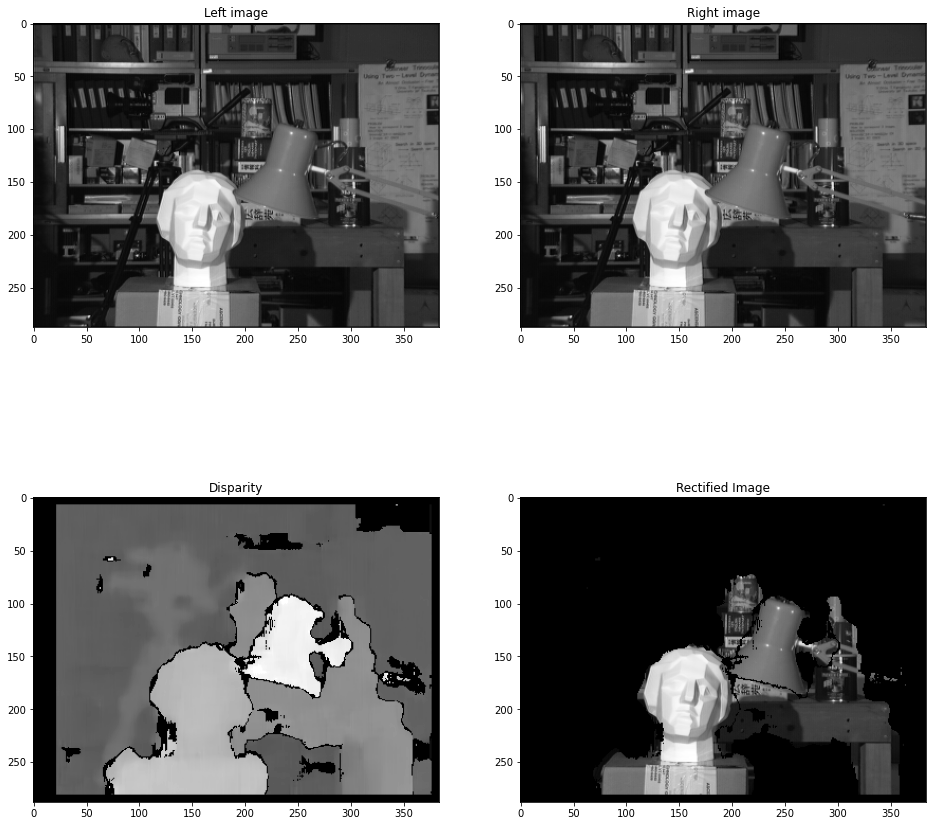

In [0]:
fig = plt.figure(figsize=(16,16))
((ax1,ax2),(ax3,ax4)) = fig.subplots(2,2)
ax1.imshow(tsu_l,'gray')
ax1.set_title('Left image')
ax2.imshow(tsu_r,'gray')
ax2.set_title('Right image')
ax3.imshow(disp,'gray')
ax3.set_title('Disparity')
ax4.imshow(ret,'gray')
ax4.set_title('Rectified Image')
plt.show()

Task4) You can take the view0.png and view1.png from the link and perform the SSD based patch matching to get the disparity map.
Report different cost metrics

In [0]:
from PIL import Image
root='drive/My Drive/Day4 Material/'
v0=cv2.imread(root+'view0.png')
v1=cv2.imread(root+'view1.png')

In [332]:
v0.shape

(354, 400, 3)

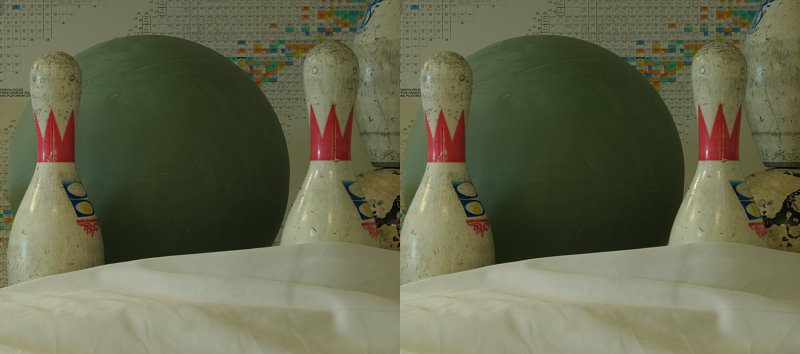

In [323]:
from google.colab.patches import cv2_imshow
cv2_imshow(np.hstack([v0,v1]))

In [0]:
from PIL import Image
def ssd_match(left_image, right_image, kernel, max_offset):
    left_i = Image.open(left_image).convert('L')
    left = np.asarray(left_i)
    right_i = Image.open(right_image).convert('L')
    right = np.asarray(right_i)    
    w, h = left_image.size 

    disparity = np.zeros((w, h), np.uint8)
    disparity.shape = h, w
       
    kernel_half = int(kernel / 2)    
    offset_adjust = 255 / max_offset
      
    for y in range(kernel_half, h - kernel_half):      
        for x in range(kernel_half, w - kernel_half):
            best_offset = 0
            prev_ssd = 65534
            
            for offset in range(max_offset):               
                ssd = 0
                ssd_temp = 0                            
                for v in range(-kernel_half, kernel_half):
                    for u in range(-kernel_half, kernel_half):
                        ssd_temp = int(left[y+v, x+u]) - int(right[y+v, (x+u) - offset])  
                        ssd += ssd_temp * ssd_temp              

                if ssd < prev_ssd:
                    prev_ssd = ssd
                    best_offset = offset

            disparity[y, x] = best_offset * offset_adjust
    return disparity                 


In [0]:
disparity = ssd_match(root+'view0.png', root+'view1.png', 6, 30)

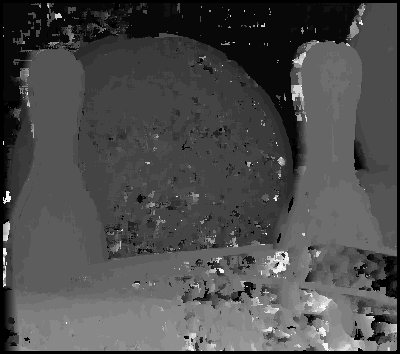

In [352]:
disparity